<a href="https://colab.research.google.com/github/DylanML/Sentiment-Analysis/blob/main/An%C3%A1lisis_de_Sentimiento1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
df = pd.read_excel('googleplay_dataset.xlsx')

In [28]:
df.head(1000)

,userName,content
0,Eric Tie,I cannot open the app anymore
1,john alpha,I have been begging for a refund from this app...
2,Sudhakar .S,Very costly for the premium version (approx In...
3,SKGflorida@bellsouth.net DAVID S,"Used to keep me organized, but all the 2020 UP..."
4,Louann Stoker,Dan Birthday Oct 28
...,...,...
995,?????? ?????,"For sure, this app is good enough, but! After ..."
996,Keith Fischer,This app does not work on my smartwatch. I am ...
997,David Thrift,"Starting out this app was ok, but then I start..."
998,Ritu K,Extremely complicated to use. can't understand...


In [29]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [31]:
df['Subjectivity'] = df['content'].apply(get_subjectivity)
df['Polarity'] = df['content'].apply(get_polarity)

df.head(1000)

,userName,content,Subjectivity,Polarity
0,Eric Tie,I cannot open the app anymore,0.500000,0.000000
1,john alpha,I have been begging for a refund from this app...,0.000000,0.000000
2,Sudhakar .S,Very costly for the premium version (approx In...,0.560000,0.360000
3,SKGflorida@bellsouth.net DAVID S,"Used to keep me organized, but all the 2020 UP...",0.175000,-0.667572
4,Louann Stoker,Dan Birthday Oct 28,0.000000,0.000000
...,...,...,...,...
995,?????? ?????,"For sure, this app is good enough, but! After ...",0.431481,0.066667
996,Keith Fischer,This app does not work on my smartwatch. I am ...,0.625000,-0.250000
997,David Thrift,"Starting out this app was ok, but then I start...",0.438095,0.039286
998,Ritu K,Extremely complicated to use. can't understand...,0.550000,0.150000


In [32]:
def sentiment(score):
  if score < 0:
    return 'Negativo'
  elif score == 0:
     return 'Neutral'
  else:
     return 'Positivo'

In [33]:
df['Resultado'] = df['Polarity'].apply(sentiment)
df.head(1000)

,userName,content,Subjectivity,Polarity,Resultado
0,Eric Tie,I cannot open the app anymore,0.500000,0.000000,Neutral
1,john alpha,I have been begging for a refund from this app...,0.000000,0.000000,Neutral
2,Sudhakar .S,Very costly for the premium version (approx In...,0.560000,0.360000,Positivo
3,SKGflorida@bellsouth.net DAVID S,"Used to keep me organized, but all the 2020 UP...",0.175000,-0.667572,Negativo
4,Louann Stoker,Dan Birthday Oct 28,0.000000,0.000000,Neutral
...,...,...,...,...,...
995,?????? ?????,"For sure, this app is good enough, but! After ...",0.431481,0.066667,Positivo
996,Keith Fischer,This app does not work on my smartwatch. I am ...,0.625000,-0.250000,Negativo
997,David Thrift,"Starting out this app was ok, but then I start...",0.438095,0.039286,Positivo
998,Ritu K,Extremely complicated to use. can't understand...,0.550000,0.150000,Positivo


In [34]:
df.to_excel('googleplayreviews.xlsx')

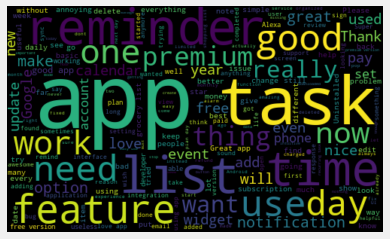

In [35]:
all_words = ' '.join( [twts for twts in df['content']])
word_Cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

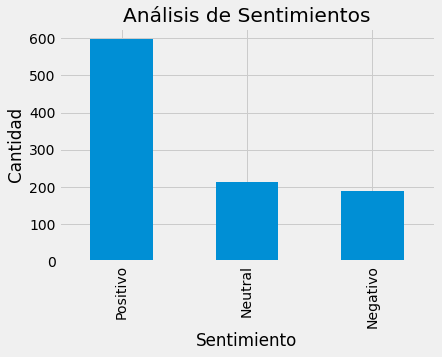

In [36]:
df['Resultado'].value_counts()

plt.title('Análisis de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
df['Resultado'].value_counts().plot(kind='bar')
plt.show()